In [4]:
#Notebook to analyze data from game changer seasonal stat export

In [5]:
#import packages

import pandas as pd
from matplotlib import pyplot as plt

In [19]:
initial_df = pd.read_csv('../data/tnbh11202022.csv')

In [22]:
#In the first row of the seasonal stats csv, there are 3 columm values. 'Batting', 'Pitching', and 'Fielding'
#We want to slice the data from column1 to the 'Pitching' value
#Drop the 'Pitching' column and call the new dataframe, initial_batting_df

initial_batting_df = initial_df.loc[:,:'Pitching'].drop(['Pitching'], axis='columns')

#Slice the csv from 'Pitching' to 'Fielding' and create the initial_pitching_df

initial_pitching_df = initial_df.loc[:,'Pitching':'Fielding'].drop(['Fielding'], axis='columns')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Batting,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,Number,Last,First,GP,PA,AB,AVG,OBP,OPS,SLG,...,PS,PS/PA,2S+3,2S+3%,6+,6+%,AB/HR,GIDP,GITP,CI
1,0,H,Cameron,20,29,20,0.2,0.429,0.629,0.2,...,113,3.897,4,13.79,6,20.69,0,0,0,0
2,3,T,Kyndall,27,45,35,0.171,0.356,0.527,0.171,...,155,3.444,3,6.67,5,11.11,0,0,0,0
3,4,O,Mia,23,42,38,0.289,0.341,0.684,0.342,...,135,3.214,3,7.14,5,11.9,0,0,0,0
4,9,V,Lauren,26,49,46,0.217,0.265,0.483,0.217,...,133,2.714,3,6.12,3,6.12,0,0,0,0


In [43]:
#we need to change the column header row from the "unamed" headers to the first row in the csv which contain headers like "AVG", "OBS", etc

#grab the first row for the header
new_batting_header = initial_batting_df.iloc[0]
new_pitching_header = initial_pitching_df.iloc[0]

#take the data minus the header row. this creates a new dataframe
initial_batting_df_drop_header_row = initial_batting_df[1:]
initial_pitching_df_drop_header_row = initial_pitching_df[1:]

#set the header row as the df header. the .column sets the headers of the dataframe
initial_batting_df_drop_header_row.columns = new_batting_header
initial_pitching_df_drop_header_row.columns = new_pitching_header


In [10]:
#drop the row that contains the glossary
initial_batting_df_drop_glossary = initial_batting_df_drop_header_row[initial_batting_df_drop_header_row.Number != "Glossary"]


In [11]:
#drop rows where the 'Number'j column contains nulls
initial_batting_df_drop_nan = initial_batting_df_drop_glossary[initial_batting_df_drop_glossary['Number'].notna()]

initial_batting_df_drop_total = initial_batting_df_drop_nan[initial_batting_df_drop_nan['First'].notna()]

In [12]:

#initial_batting_df_drop_nan["Number"] = initial_batting_df_drop_nan["Number"].astype(int)
initial_batting_df_drop_nan.loc[:,"GP"] = initial_batting_df_drop_nan["GP"].astype(int)
initial_batting_df_drop_nan.loc[:,"AVG"] = initial_batting_df_drop_nan["AVG"].astype(float)
initial_batting_df_drop_nan.loc[:,"OBP"] = initial_batting_df_drop_nan["OBP"].astype(float)
initial_batting_df_drop_nan.loc[:,"OPS"] = initial_batting_df_drop_nan["OPS"].astype(float)
initial_batting_df_drop_nan.loc[:,"First"] = initial_batting_df_drop_nan["First"].astype(str)

initial_batting_df_drop_total.loc[:,"GP"] = initial_batting_df_drop_total["GP"].astype(int)
initial_batting_df_drop_total.loc[:,"AVG"] = initial_batting_df_drop_total["AVG"].astype(float)
initial_batting_df_drop_total.loc[:,"OBP"] = initial_batting_df_drop_total["OBP"].astype(float)
initial_batting_df_drop_total.loc[:,"OPS"] = initial_batting_df_drop_total["OPS"].astype(float)
initial_batting_df_drop_total.loc[:,"First"] = initial_batting_df_drop_total["First"].astype(str)

/Users/danielhighsmith/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/Users/danielhighsmith/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [47]:
# Create a new dataframe with platers who have played 8 games or more

final_batting_df = initial_batting_df_drop_total.loc[(initial_batting_df_drop_total['GP'] >= 8)]

,Number,Last,First,GP,PA,AB,AVG,OBP,OPS,SLG,...,PS,PS/PA,2S+3,2S+3%,6+,6+%,AB/HR,GIDP,GITP,CI
1,0,H,Cameron,20,29,20,0.200,0.429,0.629,0.2,...,113,3.897,4,13.79,6,20.69,0,0,0,0
2,3,T,Kyndall,27,45,35,0.171,0.356,0.527,0.171,...,155,3.444,3,6.67,5,11.11,0,0,0,0
3,4,O,Mia,23,42,38,0.289,0.341,0.684,0.342,...,135,3.214,3,7.14,5,11.9,0,0,0,0
4,9,V,Lauren,26,49,46,0.217,0.265,0.483,0.217,...,133,2.714,3,6.12,3,6.12,0,0,0,0
6,13,W,Kyler,23,43,38,0.211,0.302,0.565,0.263,...,128,2.977,4,9.3,4,9.3,0,0,0,0
8,17,W,Lauren Paige,20,32,27,0.333,0.438,0.993,0.556,...,117,3.656,7,21.88,5,15.63,0,0,0,0
9,24,McCord,Aleigha,23,48,42,0.381,0.447,0.828,0.381,...,155,3.229,3,6.25,5,10.42,0,0,0,0
10,25,H,Ava,14,20,13,0.385,0.579,1.271,0.692,...,71,3.55,1,5,4,20,0,0,0,0
11,32,Costello,Lyric,20,40,32,0.375,0.474,0.974,0.5,...,115,2.875,2,5,2,5,0,0,0,0
12,33,H,AC,25,53,39,0.385,0.547,0.932,0.385,...,188,3.547,3,5.66,7,13.21,0,0,0,0


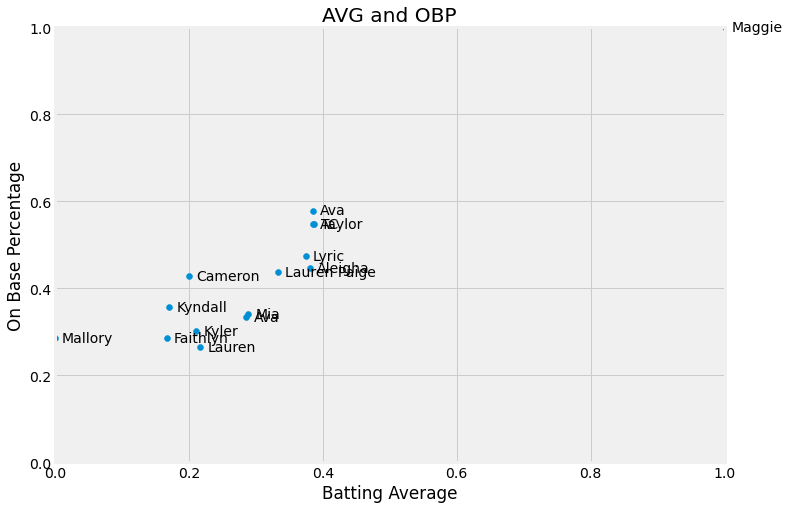

In [13]:
# Plot the AVG column on the x-axis and the OBP column on the y-axis
# plt.xlim and plt.ylim moves the graph out to 1.0 which is a 1000 batting average and 1000 on base percentage
# plt.figure increases the plot size so the scatter plot is not so crowded
fig = plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.scatter(final_batting_df["AVG"], final_batting_df["OBP"])
plt.xlabel("Batting Average")
plt.ylabel('On Base Percentage')
plt.title('AVG and OBP')
plt.grid()
plt.xlim((0,1))
plt.ylim((0,1))


for x_pos, y_pos, label in zip(final_batting_df["AVG"], final_batting_df["OBP"], final_batting_df["First"]):
    plt.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# plt.savefig('avg_obp.png') 
# gc_team_t = np.transpose(gc_team)

#plt.grid() shows grid lines on the plot
plt.grid()

plt.show()

<BarContainer object of 15 artists>

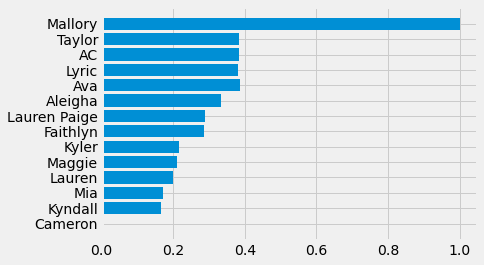

In [14]:
#horizontal bar chare of batting averages, sorted AVG with the sorted() function
plt.barh(initial_batting_df_drop_total.First, sorted(initial_batting_df_drop_total.AVG))
